Install the gmplot package for use later. 

In [1]:
pip install gmplot

Note: you may need to restart the kernel to use updated packages.


Import pandas to allow data reading and filtering. 

In [2]:
import pandas as pd

Read in data to be used in programme via pandas. 

In [3]:
lymeData = pd.read_csv("LDData.csv")

Check that data has been imported from csv correctly by viewing a head and tail summary of the file. 

Note that on row 70 the habitat sampled is described as garden and coordinate information is not provided. 

In [4]:
lymeData

,LD incidence,Island*,Habitat,Year,Longitude,Latitude,TNC,NP1M,NT,Prevalence
0,Low,S. Harris,I. grassland,2018,57.8229,-7.04121,100,32.5,100.0,0.0
1,Low,S. Harris,I. grassland,2019,57.8033,-6.76844,190,20.0,50.0,2.0
2,Low,S. Harris,I. grassland,2019,57.8599,-6.97867,1,0.0,NaN,NaN
3,Low,S. Harris,I. grassland,2019,57.83909,-6.75505,6,0.0,NaN,NaN
4,Low,S. Harris,H. moorland,2018,57.76642,-6.99558,100,10.5,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...
70,High,S. Uist,Garden,2018,sector 15,NaN,6,2.5,NaN,NaN
71,High,S. Uist,Machair,2018,57.35096,-7.39092,2,1.0,NaN,NaN
72,High,S. Uist,Machair,2018,57.30452,-7.39269,0,0.0,NaN,NaN
73,High,S. Uist,Machair,2018,57.24395,-7.42612,6,1.0,NaN,NaN


To remove these rows for which coordinate data is not present a filter is written whereby Habitat must not equal Garden. 

This filter is then applied to the data with the fitered data being saved as a new variable. 

In [5]:
gardenFilter = lymeData["Habitat"] != "Garden"
lymeDataCor = lymeData[gardenFilter]

Having applied the filter we check to see that our new filtered variable only contains data points where habitat does not equal Garden and find that to have worked, removing 12 rows. 

In [6]:
lymeDataCor

,LD incidence,Island*,Habitat,Year,Longitude,Latitude,TNC,NP1M,NT,Prevalence
0,Low,S. Harris,I. grassland,2018,57.8229,-7.04121,100,32.5,100.0,0.0
1,Low,S. Harris,I. grassland,2019,57.8033,-6.76844,190,20.0,50.0,2.0
2,Low,S. Harris,I. grassland,2019,57.8599,-6.97867,1,0.0,NaN,NaN
3,Low,S. Harris,I. grassland,2019,57.83909,-6.75505,6,0.0,NaN,NaN
4,Low,S. Harris,H. moorland,2018,57.76642,-6.99558,100,10.5,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...
63,High,S. Uist,"Bog,peatland",2018,57.27817,-7.37005,4,0.0,NaN,NaN
71,High,S. Uist,Machair,2018,57.35096,-7.39092,2,1.0,NaN,NaN
72,High,S. Uist,Machair,2018,57.30452,-7.39269,0,0.0,NaN,NaN
73,High,S. Uist,Machair,2018,57.24395,-7.42612,6,1.0,NaN,NaN


To initially visalise any particularly obvious relationship between tick density and lyme disease prevelance (the percentage of nymphs carrying Borrelia burgdorferri) a scatter plot of prevalence against nymphs per hundred metres is generated. 

<AxesSubplot:xlabel='NP1M', ylabel='Prevalence'>

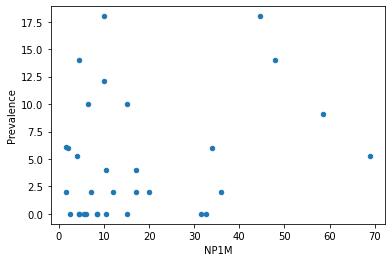

In [7]:
lymeDataCor.plot.scatter("NP1M", "Prevalence")

To simply model any trends in these X and y variables, a linear regression function is imported from the SciKit learn package. 

As lyme disease prevelance must be 0% where no nymphs per 100m are present we set fit_intercept to False, meaning that our y intercept is made to be 0. 

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)

As prevalence was only measured at sites where >50 nymphs were collected in total (TNC > 50), we filter the data to be used in our model to exclude rows where prevalence was not recorded. 

In [9]:
lymeDataCorMod = lymeDataCor[lymeDataCor["Prevalence"].notna()]
lymeDataCorMod

,LD incidence,Island*,Habitat,Year,Longitude,Latitude,TNC,NP1M,NT,Prevalence
0,Low,S. Harris,I. grassland,2018,57.8229,-7.04121,100,32.5,100.0,0.00
1,Low,S. Harris,I. grassland,2019,57.8033,-6.76844,190,20.0,50.0,2.00
4,Low,S. Harris,H. moorland,2018,57.76642,-6.99558,100,10.5,100.0,0.00
8,Low,Barra,I. grassland,2018,57.00991,-7.49054,98,5.5,98.0,0.00
12,Low,Barra,H. moorland,2018,57.01508,-7.45006,110,6.0,100.0,0.00
13,Low,Barra,H. moorland,2019,56.96077,-7.51683,59,4.5,54.0,0.00
14,Low,Barra,H. moorland,2019,56.97012,-7.50559,137,8.5,57.0,0.00
15,Low,Barra,H. moorland,2019,56.97535,-7.42723,84,2.0,50.0,6.00
17,High,N. Uist,I. grassland,2018,57.59542,-7.37803,59,44.5,50.0,18.00
18,High,N. Uist,I. grassland,2018,57.55027,-7.27865,51,17.0,50.0,2.00


We then reset the index of the data to reflect the rows that have been removed. (Without doing so an error was recieved while modelling.)

In [10]:
lymeDataCorMod = lymeDataCorMod.reset_index()
lymeDataCorMod

,index,LD incidence,Island*,Habitat,Year,Longitude,Latitude,TNC,NP1M,NT,Prevalence
0,0,Low,S. Harris,I. grassland,2018,57.8229,-7.04121,100,32.5,100.0,0.00
1,1,Low,S. Harris,I. grassland,2019,57.8033,-6.76844,190,20.0,50.0,2.00
2,4,Low,S. Harris,H. moorland,2018,57.76642,-6.99558,100,10.5,100.0,0.00
3,8,Low,Barra,I. grassland,2018,57.00991,-7.49054,98,5.5,98.0,0.00
4,12,Low,Barra,H. moorland,2018,57.01508,-7.45006,110,6.0,100.0,0.00
5,13,Low,Barra,H. moorland,2019,56.96077,-7.51683,59,4.5,54.0,0.00
6,14,Low,Barra,H. moorland,2019,56.97012,-7.50559,137,8.5,57.0,0.00
7,15,Low,Barra,H. moorland,2019,56.97535,-7.42723,84,2.0,50.0,6.00
8,17,High,N. Uist,I. grassland,2018,57.59542,-7.37803,59,44.5,50.0,18.00
9,18,High,N. Uist,I. grassland,2018,57.55027,-7.27865,51,17.0,50.0,2.00


As SciKit learn requires X data in the form of a dataframe, we generate a data frame of nymphs per 100m using the model data. 

In [11]:
X = lymeDataCorMod[["NP1M"]]
X

,NP1M
0,32.5
1,20.0
2,10.5
3,5.5
4,6.0
5,4.5
6,8.5
7,2.0
8,44.5
9,17.0


The y data (prevalence) is then also saved as a matrix for use in our model. 

In [12]:
y = lymeDataCorMod["Prevalence"]
y

0      0.00
1      2.00
2      0.00
3      0.00
4      0.00
5      0.00
6      0.00
7      6.00
8     18.00
9      2.00
10     6.12
11     4.00
12    14.00
13     5.26
14     2.00
15    12.07
16     4.00
17     9.09
18     6.00
19     0.00
20    10.00
21     2.00
22     2.00
23     5.26
24     2.00
25    14.00
26     0.00
27     0.00
28    18.00
29     0.00
30     0.00
31    10.00
Name: Prevalence, dtype: float64

We then apply the model to our data.

In [13]:
model.fit(X, y)

LinearRegression(fit_intercept=False)

To determine the range of X value in our data set for which w should model y values we use the min() and max() commands.

In [14]:
X["NP1M"].min()

1.5

In [15]:
X["NP1M"].max()

69.0

We then predict y values at these min and max X values, these predictions are shown below. 

In [16]:
x_fit = pd.DataFrame({"x": [1.5, 69]})
y_pred = model.predict(x_fit)

In [17]:
y_pred

array([ 0.27045766, 12.44105224])

To plot the line generated by our linear regression onto a scatter plot of lyme disease prevelance against number of nymphs per 100m we import pyplot from the matplotlib package. A plot is then generated and to that plot our data points and a line of best fit is added. 

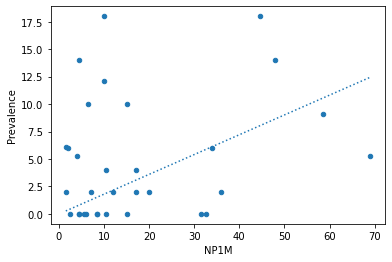

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
lymeDataCorMod.plot.scatter("NP1M", "Prevalence", ax=ax)
ax.plot(x_fit["x"], y_pred, linestyle=":")

The gradient of our linear regression model is then plotted. as this is found to be 0.18 we can see that for every nymph per 100m on the islands of Barra, South Uist, Benbecula, North Uist and Harris, we predict the proportion of ticks carrying lyme disease cauing bacteria to increase by 0.18%. 

In [19]:
print("Model gradient: ", model.coef_[0])

Model gradient:  0.18030510488787846


The seaborn package is imported owing to the ease at which it can be used to visualise data. 

In [20]:
import seaborn as sns

Seaborn is used to generate a simple box plot highlighting the differences in tick densities at different site types sampled, namely that very few ticks are present in machair relative to other sample sites. 

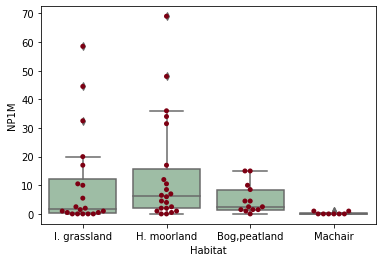

In [21]:
ax = sns.boxplot(x='Habitat', y='NP1M', data=lymeDataCor, color='#99c2a2')
ax = sns.swarmplot(x="Habitat", y="NP1M", data=lymeDataCor, color='#7d0013')
plt.show()

To generate heatmaps later based on the number of ticks found per 100m (NP1M) and the prevalence of ticks infected with lyme disease at various sample sites we either:

Duplicate each row by half NP1M. NP1M is halved in order to increase heatmap resolution, we then add 1 so that sites were NP1M = 0 are still represented as having low densities.

Or...

Multiply by prevealence at sites where prevalence was assessed. 


In [22]:
lymeDataHM = lymeDataCor.loc[lymeDataCor.index.repeat((lymeDataCor.NP1M/2)+1)]
lymeDataHM

,LD incidence,Island*,Habitat,Year,Longitude,Latitude,TNC,NP1M,NT,Prevalence
0,Low,S. Harris,I. grassland,2018,57.8229,-7.04121,100,32.5,100.0,0.0
0,Low,S. Harris,I. grassland,2018,57.8229,-7.04121,100,32.5,100.0,0.0
0,Low,S. Harris,I. grassland,2018,57.8229,-7.04121,100,32.5,100.0,0.0
0,Low,S. Harris,I. grassland,2018,57.8229,-7.04121,100,32.5,100.0,0.0
0,Low,S. Harris,I. grassland,2018,57.8229,-7.04121,100,32.5,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...
63,High,S. Uist,"Bog,peatland",2018,57.27817,-7.37005,4,0.0,NaN,NaN
71,High,S. Uist,Machair,2018,57.35096,-7.39092,2,1.0,NaN,NaN
72,High,S. Uist,Machair,2018,57.30452,-7.39269,0,0.0,NaN,NaN
73,High,S. Uist,Machair,2018,57.24395,-7.42612,6,1.0,NaN,NaN


In [23]:
lymeDataHMP = lymeDataCorMod.loc[lymeDataCorMod.index.repeat(lymeDataCorMod.Prevalence)]
lymeDataHMP

,index,LD incidence,Island*,Habitat,Year,Longitude,Latitude,TNC,NP1M,NT,Prevalence
1,1,Low,S. Harris,I. grassland,2019,57.8033,-6.76844,190,20.0,50.0,2.0
1,1,Low,S. Harris,I. grassland,2019,57.8033,-6.76844,190,20.0,50.0,2.0
7,15,Low,Barra,H. moorland,2019,56.97535,-7.42723,84,2.0,50.0,6.0
7,15,Low,Barra,H. moorland,2019,56.97535,-7.42723,84,2.0,50.0,6.0
7,15,Low,Barra,H. moorland,2019,56.97535,-7.42723,84,2.0,50.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
31,61,High,S. Uist,"Bog,peatland",2018,57.24486,-7.35349,270,15.0,50.0,10.0
31,61,High,S. Uist,"Bog,peatland",2018,57.24486,-7.35349,270,15.0,50.0,10.0
31,61,High,S. Uist,"Bog,peatland",2018,57.24486,-7.35349,270,15.0,50.0,10.0
31,61,High,S. Uist,"Bog,peatland",2018,57.24486,-7.35349,270,15.0,50.0,10.0


Here we import the numpy package. This package allows for easy array generation, allowing us to convert our tabular data to an array format for later analysis. 

In [24]:
import numpy as np

Generate a 2d array of latitudes from filtered data. 

In [25]:
lymeDataLatArrayHM = pd.DataFrame(lymeDataHM["Latitude"]).to_numpy()

In [26]:
lymeDataLatArrayHMP = pd.DataFrame(lymeDataHMP["Latitude"]).to_numpy()

Do the same for longitudes. 

In [27]:
lymeDataLongArrayHM = pd.DataFrame(lymeDataHM["Longitude"]).to_numpy()

In [28]:
lymeDataLongArrayHMP = pd.DataFrame(lymeDataHMP["Longitude"]).to_numpy()

import the gmplot package for map plot geeneration using google maps as a basis. 

In [29]:
import gmplot

User inputs coordinate information from Barra, South Uist, Benbecula, North Uist or Harris relating to somewhere they may be able to sample (e.g. the coordinates of their garden such 57.582118, -7.254300). 

User input is then converted from string to float for plotting. 

In [30]:
print("Please input longitude to sample from Barra, South Uist, Benbecula, North Uist or Harris")
input_long = input()
input_long = float(input_long)

Please input longitude to sample from Barra, South Uist, Benbecula, North Uist or Harris


 57.267598


In [31]:
print("Please input latitude to sample from Barra, South Uist, Benbecula, North Uist or Harris")
input_lat = input()
input_lat = float(input_lat)

Please input latitude to sample from Barra, South Uist, Benbecula, North Uist or Harris


 -7.320495


Longitude of input is checked to determine whether input site is within an area of high lyme disease incidence (Uists/Benbecula).

In [32]:
if input_long < 57.696453 and input_long > 57.095252:
    print("lyme disease incidence in this area is classed as: high. Extra precaution may be necessary when sampling from these sites.")
else:
    print("lyme disease incidence in this area is classed as: low")

lyme disease incidence in this area is classed as: high. Extra precaution may be necessary when sampling from these sites.


Five random sample sites are selected within around 1km^2 of the input site. these coordinates could then serve as the focal points for four 20 m tick drags in each cardinal direction. 

In [33]:
randLongs = np.random.uniform(low=(input_long-0.005), high=(input_long+0.005), size=(5,))
randLongs

array([57.26355495, 57.2703135 , 57.27114047, 57.26613579, 57.26786111])

In [40]:
randLats = np.random.uniform(low=(input_lat-0.009), high=(input_lat+0.009), size=(5,))
randLats

array([-7.3263134 , -7.32592524, -7.32591899, -7.32399298, -7.32211187])

If intending to use this for a publically accessable tool an api key could be generated/purchased. This would remove the 'For development use' water marks on the map and allow for increased functionality with tools available natively within google maps.

In [35]:
apikey = '' 

GoogleMapPlotter allows us to select the focal point of our map, our map scale and a google maps api key should we have one. 

In [43]:
gmap = gmplot.GoogleMapPlotter(57.41, -7.2812, 9, apikey=apikey)

Here we add our data to google maps.

Heatmap - generates a heatmap based on the frequencie of input data, in this case our frequencies of input data represent the number of nymphs per 100 metres at each non-garden sample site where any nymphs were found.

Scatter - marks coordinate data arrays onto map.

Marker - places a google maps 'pin' at the indicated position. In this case the pin represents the user input coordinates. zooming in on this pin using the mouse cursor and scroll wheel/ + or - buttons allows the randomised sample sites to be found. 

In [44]:
gmap.heatmap(lymeDataLongArrayHM, lymeDataLatArrayHM)
gmap.scatter(lymeDataLongArrayHM, lymeDataLatArrayHM, c='r', marker=False, size = 5)

Draw produces a html webpage using the data provided. This file should be saved in your current working directory. if opening in jupyter lab ensure to click 'Trust HTML' in the top left. Try zoooming in on the pin placed at the coordinates you input earlier. 

In [45]:
gmap.draw('TickDensityMap.html')

A second heat map is generated, this time highlighting lyme disease prevalence in nymphs where this was assessed. 

In [39]:
gmap = gmplot.GoogleMapPlotter(57.41, -7.2812, 9, apikey=apikey)

gmap.heatmap(lymeDataLongArrayHMP, lymeDataLatArrayHMP)
gmap.scatter(lymeDataLongArrayHMP, lymeDataLatArrayHMP, c='r', marker=False, size = 5)

gmap.draw('LDPrevalenceMap.html')

In [42]:
gmap = gmplot.GoogleMapPlotter(57.41, -7.2812, 9, apikey=apikey)

gmap.scatter(randLongs, randLats, c='orange', marker=False, size = 50)
gmap.marker(input_long, input_lat, color='cornflowerblue')

gmap.draw('randomSampling.html')